In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest
from sw_qPCR import *

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [14]:
# Read in data from different plates and combine them
plate_ids = ['220519-plate1', '220519-plate2', '220519-plate3']
dfs = []
for plate_id in plate_ids:
    dfs.append(get_plate_data(plate_id))

df = pd.concat(dfs)
df.reset_index(inplace=True, drop=True)

# Add a few helpful columns
df['group'] = [df.Sample[i] + '___' + df.Primer[i] for i in range(len(df))]
df['well_id'] = [df.plate_id[i] + '-' + df.Well[i] for i in range(len(df))]
df['relExp_25'] = [2**(25-df.Cq[i]) for i in range(len(df))]

df.head()

,Well,Sample,Primer,Cq,plate_id,sgRNA_id,group,well_id,relExp_25
0,A01,A-188-1,Rps29 v1,19.334721,220519-plate1,188,A-188-1___Rps29 v1,220519-plate1-A01,50.747984
1,A02,A-188-2,Rps29 v1,19.577852,220519-plate1,188,A-188-2___Rps29 v1,220519-plate1-A02,42.877475
2,A03,A-188-3,Rps29 v1,19.335932,220519-plate1,188,A-188-3___Rps29 v1,220519-plate1-A03,50.705404
3,A04,A-188-4,Rps29 v1,19.627998,220519-plate1,188,A-188-4___Rps29 v1,220519-plate1-A04,41.412722
4,A05,A-188-5,Rps29 v1,20.491257,220519-plate1,188,A-188-5___Rps29 v1,220519-plate1-A05,22.764959


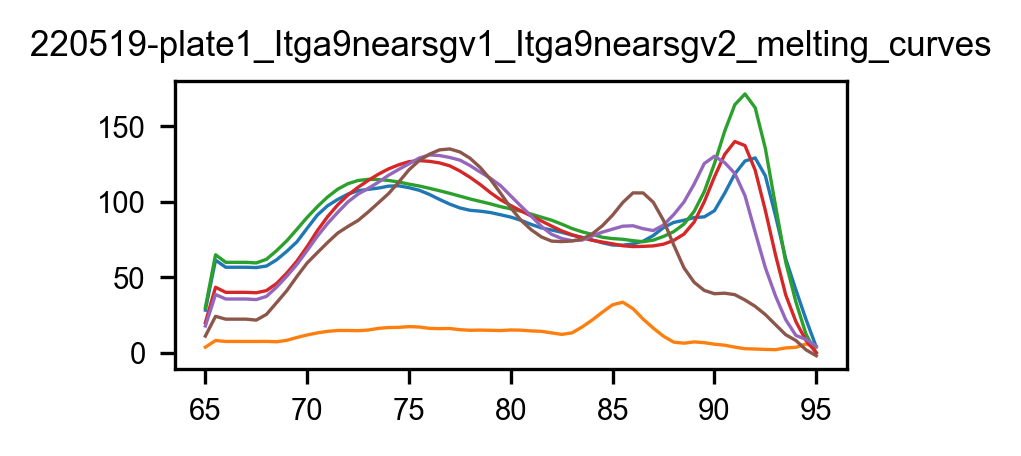

In [15]:
plate_id = '220519-plate1'
primer = ['Itga9 near sg v1', 'Itga9 near sg v2']
# df_annotation = get_annotation_data(plate_id)

plot_melting_curves(plate_id, primer, save_fig=False)

In [16]:
df_sg1 = get_expression_data(df, 'Serpinh1 sg1 v2')

In [17]:
df_sg1

,Sample,Cq_ref,relExp_25_x,Cq_test,relExp_25_y,deltaCq,relExp,Group,sgRNA_id
0,A-188-1,19.308192,51.709623,24.121491,1.838877,4.813299,0.035567,A-188,188
1,A-188-2,19.454663,46.797256,24.288221,1.639209,4.833557,0.035071,A-188,188
2,A-188-3,19.239314,54.277856,24.143611,1.810665,4.904296,0.033393,A-188,188
3,A-188-4,19.452289,46.958306,24.888545,1.081469,5.436256,0.023095,A-188,188
4,A-188-5,20.507010,22.668028,26.952580,0.258375,6.445570,0.011473,A-188,188
5,A-228-1,19.869762,35.150132,26.942180,0.260256,7.072418,0.007430,A-228,228
6,A-228-2,20.397910,24.297695,28.012417,0.124185,7.614507,0.005103,A-228,228
7,A-228-3,20.466661,23.163913,27.626942,0.162221,7.160281,0.006991,A-228,228
8,A-228-4,19.722219,38.821736,26.797408,0.287744,7.075189,0.007416,A-228,228
9,A-228-5,19.968454,32.746717,27.165812,0.222870,7.197358,0.006814,A-228,228


<AxesSubplot:xlabel='Group', ylabel='relExp'>

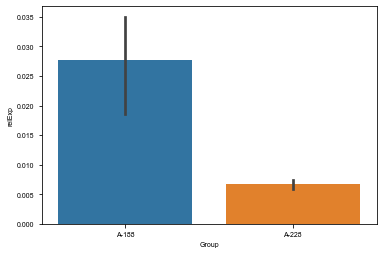

In [18]:
sns.barplot(data=df_sg1, x='Group', y='relExp')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

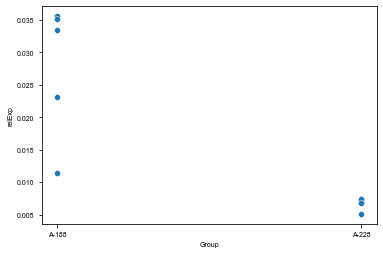

In [19]:
sns.scatterplot(data=df_sg1, x='Group', y='relExp')

In [20]:
df_sg2 = get_expression_data(df, 'Serpinh1 sg2 v1')

In [21]:
df_sg2

,Sample,Cq_ref,relExp_25_x,Cq_test,relExp_25_y,deltaCq,relExp,Group,sgRNA_id
0,A-188-1,19.308192,51.709623,24.375034,1.544511,5.066842,0.029835,A-188,188
1,A-188-2,19.454663,46.797256,24.565618,1.351385,5.110955,0.028937,A-188,188
2,A-188-3,19.239314,54.277856,24.470453,1.443624,5.231139,0.026624,A-188,188
3,A-188-4,19.452289,46.958306,25.152901,0.899671,5.700612,0.019228,A-188,188
4,A-188-5,20.507010,22.668028,27.132403,0.228081,6.625392,0.010129,A-188,188
5,A-229-1,20.070591,30.472156,27.268291,0.207599,7.197701,0.006812,A-229,229
6,A-229-2,20.670557,20.111401,28.247522,0.105413,7.576966,0.005237,A-229,229
7,A-229-3,19.766588,37.625153,27.228276,0.213472,7.461688,0.005673,A-229,229
8,A-229-4,19.765525,37.658369,26.545040,0.343046,6.779515,0.009103,A-229,229
9,A-229-5,19.735918,38.466698,26.342547,0.394739,6.606629,0.010261,A-229,229


<AxesSubplot:xlabel='Group', ylabel='relExp'>

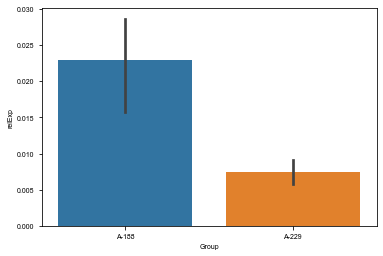

In [22]:
sns.barplot(data=df_sg2, x='Group', y='relExp')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

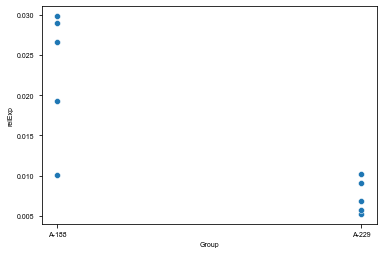

In [23]:
sns.scatterplot(data=df_sg2, x='Group', y='relExp')

In [24]:
df_sg3 = get_expression_data(df, 'Serpinh1 sg3 v1')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

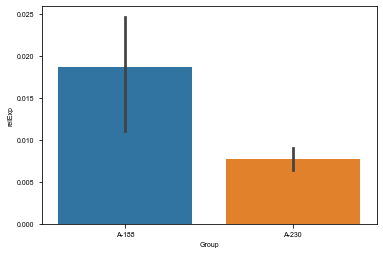

In [26]:
sns.barplot(data=df_sg3, x='Group', y='relExp')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

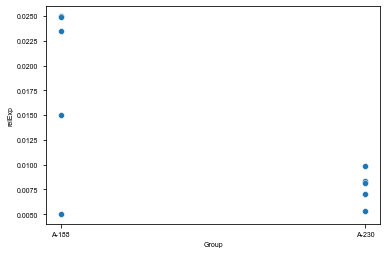

In [27]:
sns.scatterplot(data=df_sg3, x='Group', y='relExp')